In [1]:
import torch
import torch.nn as nn
import torchvision
from PIL import Image
from torchvision import transforms

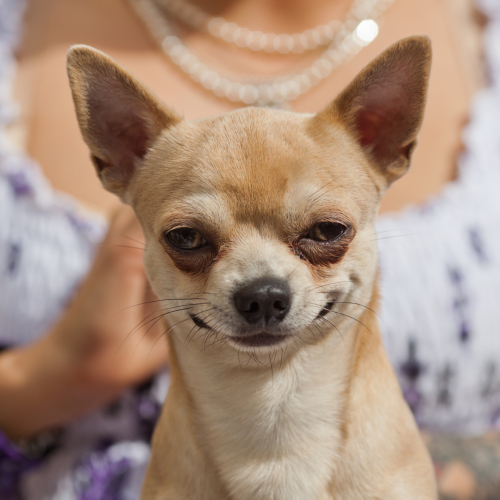

In [3]:
filename = 'pic.jpg'
image = Image.open(filename)
image = image.convert('RGB')
image

In [4]:
conv_model = nn.Conv2d( in_channels=3, 
                        out_channels=3, 
                        kernel_size=3, 
                        padding=2, 
                        stride=1, 
                        bias=False, 
                        groups=3
                        )
print('Исходные случайные веса в слое:')
print(conv_model.weight.shape)
print(conv_model.weight)

Исходные случайные веса в слое:
torch.Size([3, 1, 3, 3])
Parameter containing:
tensor([[[[-0.0072, -0.3294,  0.2636],
          [ 0.1788, -0.0885, -0.0821],
          [ 0.0517, -0.2539,  0.0838]]],


        [[[-0.2350, -0.1175, -0.2320],
          [ 0.2370, -0.1705,  0.2757],
          [-0.3084, -0.2046,  0.0573]]],


        [[[ 0.2216,  0.1916,  0.1543],
          [-0.0944,  0.0640,  0.2922],
          [ 0.2568,  0.3107, -0.1696]]]], requires_grad=True)


In [68]:
sobel_x =   [[-1,-2,-1],[0,0,0],[1,2,1]]
sobel_y =   [[-1,0,1],[-2,0,2],[-1,0,1]]
edges =     [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
unsharp =   [[-1,-4,-1],[-4,26,-4],[-1,-4,-1]]
blur =      [[1,1,1],[1,1,1],[1,1,1]]
gauss =     [[1,2,1],[2,4,2],[1,2,1]]
nochange =  [[0,0,0],[0,1,0],[0,0,0]]


W = torch.tensor( gauss )   #фильтр

with torch.no_grad():
    conv_model.weight.copy_(W)

print('Новые веса в слое:')
print(conv_model.weight.shape)
print(conv_model.weight)

Новые веса в слое:
torch.Size([3, 1, 3, 3])
Parameter containing:
tensor([[[[1., 2., 1.],
          [2., 4., 2.],
          [1., 2., 1.]]],


        [[[1., 2., 1.],
          [2., 4., 2.],
          [1., 2., 1.]]],


        [[[1., 2., 1.],
          [2., 4., 2.],
          [1., 2., 1.]]]], requires_grad=True)


In [69]:
t1 = transforms.ToTensor()
tensor_image = t1(image)
tensor_image.shape

torch.Size([3, 500, 500])

In [70]:
tensor_image = tensor_image.unsqueeze(dim=0)
tensor_image.shape

torch.Size([1, 3, 500, 500])

In [71]:
result = conv_model(tensor_image)

In [72]:
result.shape

torch.Size([1, 3, 502, 502])

In [73]:
result = result.squeeze(dim=0)
print(result.shape)

torch.Size([3, 502, 502])


In [74]:
t_image = result + 1
t_image = t_image - t_image.min()
t_image_normalized = t_image / (t_image.max() - t_image.min())

In [75]:
print(t_image_normalized.min())
print(t_image_normalized.max())

tensor(0., grad_fn=<MinBackward1>)
tensor(1., grad_fn=<MaxBackward1>)


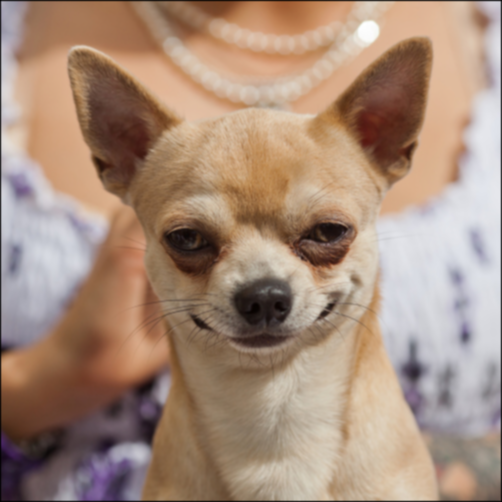

In [76]:
t2 = transforms.ToPILImage()
new_image = t2(t_image_normalized)
new_image